<a href="https://colab.research.google.com/github/ShreyoshiGhosh/PRODIGY_DS_03/blob/main/DecisionTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df  = pd.read_csv('/content/bank-full.csv' , sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
inputs = df.drop('y', axis=1)
inputs.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [10]:
output = df['y']

In [11]:
output.head(10)

0    no
1    no
2    no
3    no
4    no
5    no
6    no
7    no
8    no
9    no
Name: y, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
le_y = LabelEncoder()

In [31]:
cols = inputs.columns

In [25]:
inputs[cols] = inputs[cols].apply(le.fit_transform)

In [39]:
output

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [40]:
output['y_n'] = le_y.fit_transform(output['y'])

In [41]:
inputs = inputs.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'], axis='columns')
inputs

,age,balance,day,duration,campaign,pdays,previous
0,40,3036,4,261,0,0,0
1,26,945,4,151,0,0,0
2,15,918,4,76,0,0,0
3,29,2420,4,92,0,0,0
4,15,917,4,198,0,0,0
...,...,...,...,...,...,...,...
45206,33,1741,16,975,2,0,0
45207,53,2639,16,456,1,0,0
45208,54,5455,16,1116,4,181,3
45209,39,1584,16,508,3,0,0


In [42]:
output = output.drop('y', axis='columns')
output

,y_n
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

print('Train Score: {}'.format(decision_tree.score(X_train, y_train)))
print('Test Score: {}'.format(decision_tree.score(X_test, y_test)))

Train Score: 1.0
Test Score: 0.8590069667145859


In [55]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8004
           1       0.39      0.42      0.41      1039

    accuracy                           0.86      9043
   macro avg       0.66      0.67      0.66      9043
weighted avg       0.86      0.86      0.86      9043



In [56]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8590069667145859


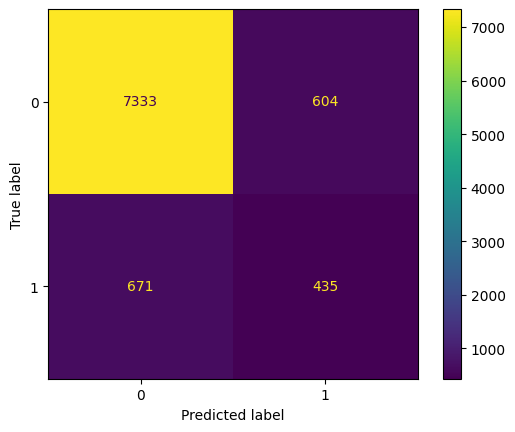

In [61]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()